* Here we will create lin reg model but in this case model params and gradient calc will be updated and done manually

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# actual correct value of bias and W(weight)
W_true = 2
b_true = 0.5

In [3]:
x = np.linspace(0, 3, 130)

y = W_true * x + b_true + np.random.randn(*x.shape) * 0.5

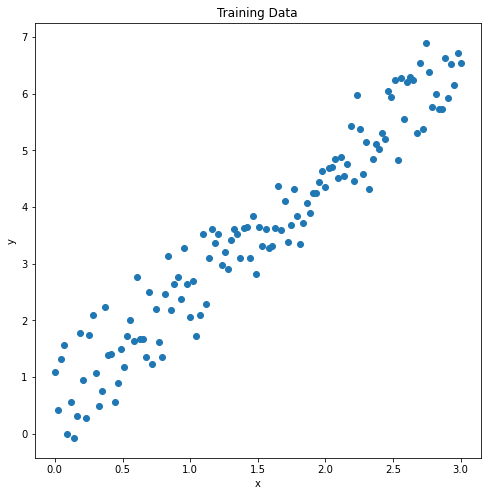

In [5]:
# data viz our gen data
plt.figure(figsize = (8, 8))

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

plt.title("Training Data")
plt.show()

In [17]:
# class to init w and b to be modified during training
class LinearModel:
    
    def __init__(self):
        self.weight = tf.Variable(np.random.randn(), name = "w")
        self.bias = tf.Variable(np.random.randn(), name ="b")
        
    def __call__(self, x):  # called during forward pass of simple linreg model
        return self.weight * x + self.bias

In [18]:
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))

In [25]:
# training process of lin model
def train(linear_model, x, y, lr = 0.01):
    with tf.GradientTape() as tape:
        
        y_pred = linear_model(x)  # passing x calls the __call__ fun of linear model class after init
        
        current_loss = loss(y, y_pred)
        
    # calc gradient of current loss wrt weight and bias(trainable params)
    d_weight, d_bias = tape.gradient(current_loss, [linear_model.weight, linear_model.bias])
    
    # updates weight value and bias value by subing lr* d_weight and d_bias from previous weight value
    linear_model.weight.assign_sub(lr * d_weight)
    linear_model.bias.assign_sub(lr * d_bias)

In [26]:
linear_model = LinearModel()

weights, biases = [], []

epochs = 10

lr = 0.15

In [27]:
for epoch_count in range(epochs):
    weights.append(linear_model.weight.numpy())
    biases.append(linear_model.bias.numpy())
    
    real_loss = loss(y, linear_model(x))
    
    train(linear_model, x, y, lr = lr)
    
    print(f"Epoch count {epoch_count}: Loss Value: {real_loss.numpy()}")

Epoch count 0: Loss Value: 6.217810153961182
Epoch count 1: Loss Value: 0.36469003558158875
Epoch count 2: Loss Value: 0.2431085705757141
Epoch count 3: Loss Value: 0.23974201083183289
Epoch count 4: Loss Value: 0.23891152441501617
Epoch count 5: Loss Value: 0.23822177946567535
Epoch count 6: Loss Value: 0.23761320114135742
Epoch count 7: Loss Value: 0.23707535862922668
Epoch count 8: Loss Value: 0.2366001009941101
Epoch count 9: Loss Value: 0.23618006706237793


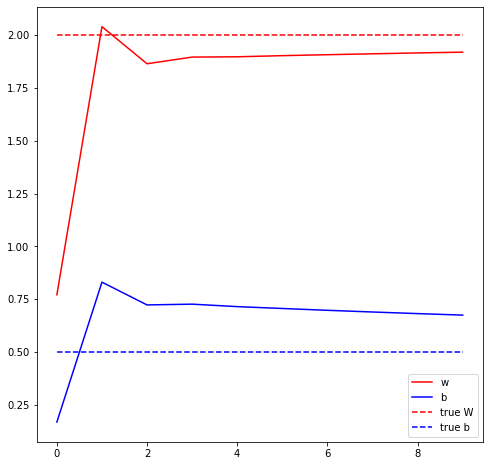

In [28]:
# data viz on how w and b of trained model, match up with actau; w and b

plt.figure(figsize = (8, 8))

plt.plot(range(epochs), weights, "r", range(epochs), biases, "b")
plt.plot([W_true] * epochs, "r--", [b_true] * epochs, "b--")

plt.legend(["w", "b", "true W", "true b"])
plt.show();

# dotted lines is true value of w and b

In [29]:
# final w and b gotten via the model
linear_model.weight, linear_model.bias

(<tf.Variable 'w:0' shape=() dtype=float32, numpy=1.9231169>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=0.6677973>)

In [30]:
# mse
rmse = loss(y, linear_model(x))

rmse.numpy()

0.23580891

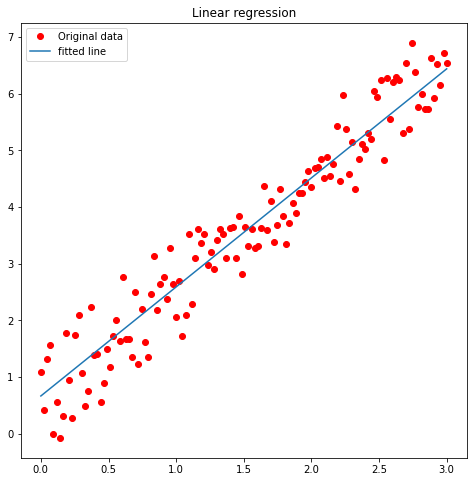

In [32]:
# viz original data and linear model as a fitted line
plt.figure(figsize = (8, 8))

plt.plot(x, y, "ro", label = "Original data")
plt.plot(x, linear_model(x), label = "fitted line")
plt.title("Linear regression")
plt.legend()
plt.show()

***
**Linear Reg using keras high level api**

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

In [35]:
x.shape, y.shape

((130,), (130,))

In [36]:
x = pd.DataFrame(x, columns = ["x"])
y = pd.DataFrame(y, columns = ["y"])

y.head()

,y
0,1.096309
1,0.421293
2,1.326806
3,1.565924
4,-0.011383


In [37]:
x.shape

(130, 1)

In [38]:
model = keras.Sequential([
    layers.Dense(1, input_shape = (1,), activation="linear")
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss = "mse", metrics = ["mse"], optimizer = optimizer)

In [39]:
model.fit(x, y, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 23.0539 - mse: 23.0539
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 21.1052 - mse: 21.1052
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 19.7447 - mse: 19.7447
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 18.5316 - mse: 18.5316
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 17.2788 - mse: 17.2788
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 16.0124 - mse: 16.0124
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 14.9360 - mse: 14.9360
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 13.9944 - mse: 13.9944
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 13.0615 - mse: 13.0615
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 12.1334 - mse: 12.1334
Epoch 11/100
5/5 [==============================] - 0s 3ms/

In [40]:
y_pred = model.predict(x)

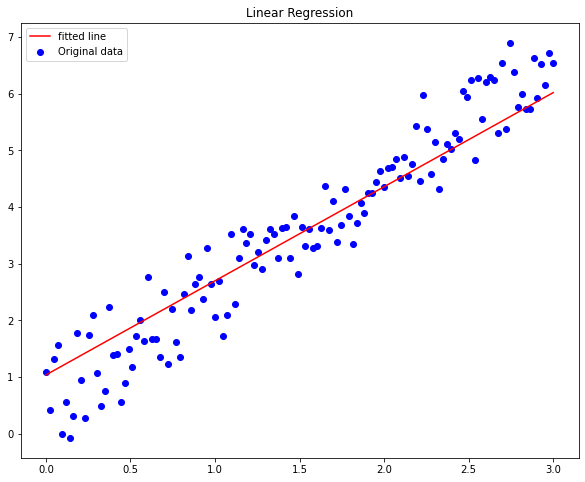

In [41]:
# data viz
plt.figure(figsize = (10, 8))

plt.scatter(x, y, c = "blue", label = "Original data")
plt.plot(x, y_pred, color = "r", label="fitted line")

plt.title("Linear Regression")
plt.legend()
plt.show()